In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# training curve

In [3]:
df = pd.read_csv('/stor/lep/workspace/multi_diffusion/MM-Diffusion/outputs/checkpoints_cross/open_lr1e4_w384_scale124_80w_uncondi_2500_03_small_wd1e4/progress.csv')
df

,current_grad_norm,current_param_norm,grad_norm,loss,loss_q0,loss_q1,loss_q2,loss_q3,mse_audio,mse_audio_q0,...,mse_audio_q2,mse_audio_q3,mse_video,mse_video_q0,mse_video_q1,mse_video_q2,mse_video_q3,param_norm,samples,step
0,0.768541,119.240539,0.974427,1.327898,1.471540,1.284789,1.266624,1.287575,0.664095,0.735176,...,0.632821,0.647787,0.663803,0.736364,0.644625,0.633803,0.639788,119.242688,6464,100
1,0.611166,119.258497,0.742256,0.608326,0.855842,0.521887,0.521775,0.519781,0.306369,0.432177,...,0.262705,0.261618,0.301958,0.423664,0.260028,0.259070,0.258163,119.247415,12864,200
2,0.676675,119.289096,0.725892,0.376379,0.640539,0.290434,0.283572,0.279977,0.189617,0.324093,...,0.141474,0.141150,0.186762,0.316446,0.144318,0.142099,0.138827,119.273937,19264,300
3,0.719240,119.318394,0.726379,0.283842,0.551436,0.199102,0.189475,0.191116,0.143717,0.282137,...,0.094577,0.095695,0.140125,0.269299,0.098818,0.094898,0.095421,119.304660,25664,400
4,0.693927,119.340467,0.698612,0.232458,0.478513,0.154335,0.147190,0.146623,0.118016,0.244697,...,0.074415,0.073700,0.114442,0.233816,0.076728,0.072775,0.072923,119.330257,32064,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,0.124615,139.141825,0.102535,0.072024,0.277032,0.007912,0.001209,0.000768,0.037866,0.145450,...,0.000651,0.000404,0.034159,0.131582,0.003571,0.000557,0.000364,139.139558,15180864,237200
2372,0.079017,139.147150,0.105928,0.073038,0.280760,0.007946,0.001241,0.000798,0.038989,0.149805,...,0.000657,0.000410,0.034049,0.130955,0.003609,0.000584,0.000388,139.144224,15187264,237300
2373,0.106972,139.153757,0.104602,0.071835,0.268710,0.007808,0.001238,0.000777,0.038205,0.142805,...,0.000660,0.000405,0.033630,0.125905,0.003534,0.000579,0.000372,139.151259,15193664,237400
2374,0.056157,139.162570,0.104177,0.073214,0.273696,0.007736,0.001243,0.000789,0.038942,0.145482,...,0.000663,0.000412,0.034272,0.128214,0.003519,0.000580,0.000377,139.158342,15200064,237500


In [4]:
# 使用移动平均平滑数据
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# 使用 Savitzky-Golay 滤波器平滑数据
def smooth_with_savgol(data, window_size, poly_order):
    return savgol_filter(data, window_size, poly_order)

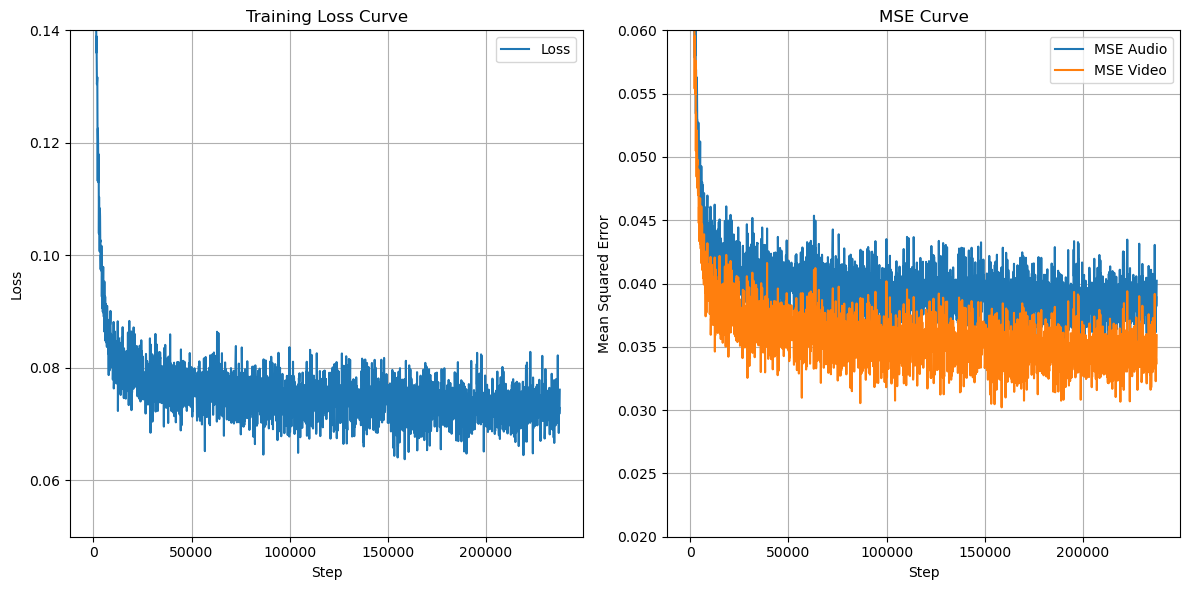

In [5]:
step = df['step'].values
loss = df['loss'].values
mse_audio = df['mse_audio'].values
mse_video = df['mse_video'].values

# 创建绘图
plt.figure(figsize=(12, 6))

# 绘制损失曲线
plt.subplot(1, 2, 1)
plt.plot(step, loss, label='Loss')
plt.title('Training Loss Curve')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.ylim([0.05,0.14])
plt.grid()
plt.legend()

# 绘制均方误差曲线
plt.subplot(1, 2, 2)
plt.plot(step, mse_audio, label='MSE Audio')
plt.plot(step, mse_video, label='MSE Video')
plt.title('MSE Curve')
plt.xlabel('Step')
plt.ylabel('Mean Squared Error')
plt.ylim([0.02,0.06])
plt.grid()
plt.legend()

# 显示图形
plt.tight_layout()
plt.show()

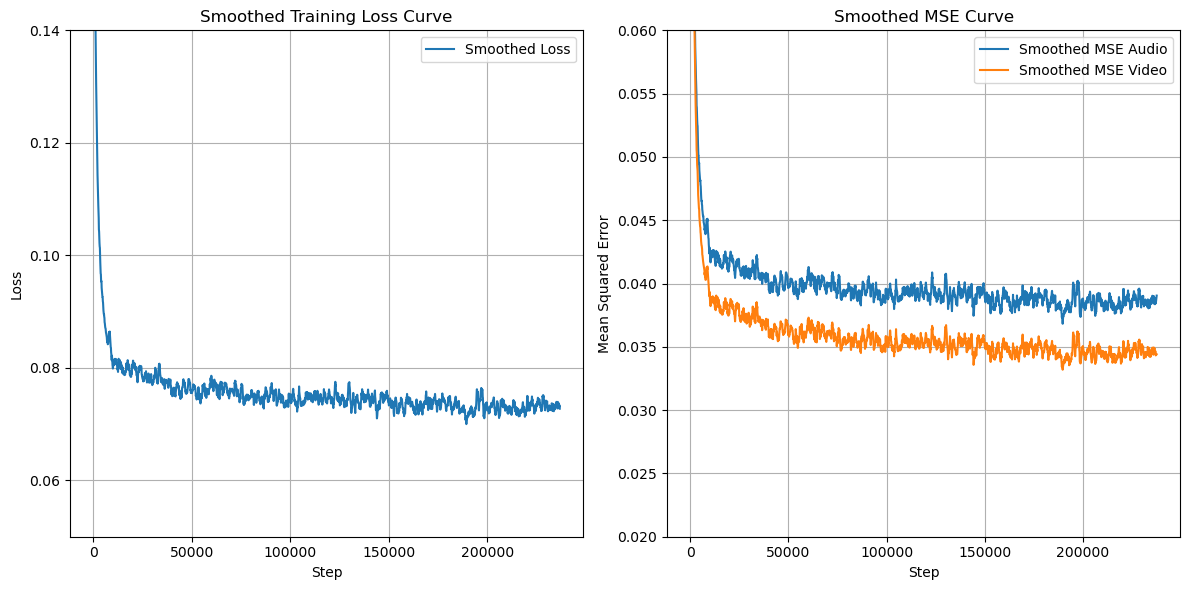

In [6]:
# 平滑参数
window_size_loss = 10  # 对损失使用的窗口大小
window_size_mse = 10   # 对 MSE 使用的窗口大小
poly_order = 1        # 多项式的阶数

# 平滑损失和MSE
smooth_loss = moving_average(loss, window_size_loss)
smooth_mse_audio = smooth_with_savgol(mse_audio, window_size_mse, poly_order)
smooth_mse_video = smooth_with_savgol(mse_video, window_size_mse, poly_order)

# 创建绘图
plt.figure(figsize=(12, 6))

# 绘制损失曲线
plt.subplot(1, 2, 1)
plt.plot(step[:len(smooth_loss)], smooth_loss, label='Smoothed Loss')
plt.title('Smoothed Training Loss Curve')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.ylim([0.05,0.14])
plt.grid()
plt.legend()

# 绘制均方误差曲线
plt.subplot(1, 2, 2)
# plt.plot(step, mse_audio, label='MSE Audio (Raw)', alpha=0.5)
plt.plot(step, smooth_mse_audio, label='Smoothed MSE Audio')
# plt.plot(step, mse_video, label='MSE Video (Raw)', alpha=0.5)
plt.plot(step, smooth_mse_video, label='Smoothed MSE Video')
plt.title('Smoothed MSE Curve')
plt.xlabel('Step')
plt.ylabel('Mean Squared Error')
plt.ylim([0.02,0.06])
plt.grid()
plt.legend()

# 显示图形
plt.tight_layout()
plt.show()

# scale up

In [40]:
diffusion_rna_lisi = [0.86609,0.86821,0.88146,0.87908,0.87898]
diffusion_atac_lisi = [0.77112,0.83131,0.86639,0.89064,0.90944]
diffusion_rna_auc = [0.69998,0.67149,0.65001,0.64466,0.65012]
diffusion_atac_auc = [0.73052,0.70876,0.65619,0.60456,0.60131]

scdesign_rna_lisi = [0.85007,0.84655]
scdesign_atac_lisi = [0.77914,0.80235]
scdesign_rna_auc = [0.74513,0.75539]
scdesign_atac_auc = [0.84621,0.77471]

cfgen_rna_lisi = [0.83858,0.82226,0.86603,0.85126,0.82613]
cfgen_atac_lisi = [0.80231,0.81505,0.84398,0.86984,0.89316]
cfgen_rna_auc = [0.71658,0.71060,0.69622,0.701652,0.73086]
cfgen_atac_auc = [0.79974,0.75207,0.72034,0.71019,0.63011]

multivi_rna_lisi = [0.77486,0.83373,0.85113,0.84871,0.83806]
multivi_atac_lisi = [0.65838,0.72475,0.71509,0.73211,0.72364]
multivi_rna_auc = [0.81040,0.76910,0.71332,0.70054,0.72231]
multivi_atac_auc = [1.0,0.99999,0.99999,0.99999,0.99999]

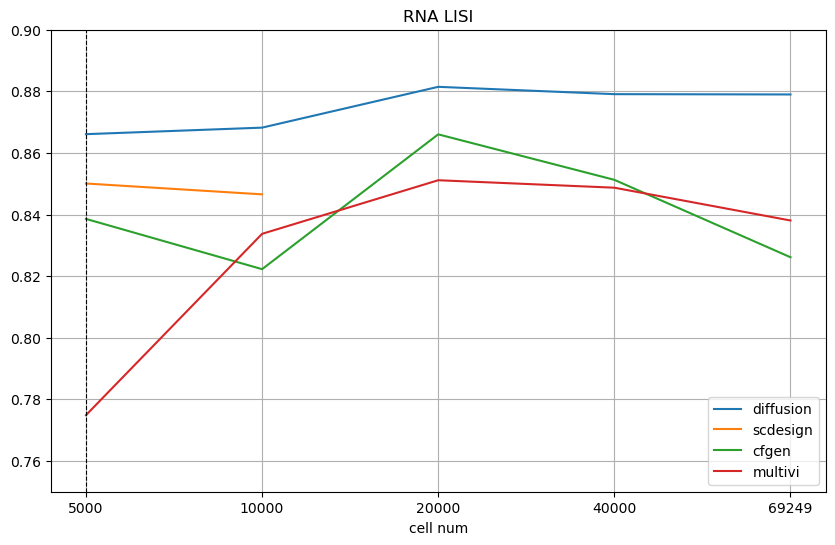

In [41]:
# 创建折线图
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.figure(figsize=(10, 6))  # 设置图形大小
x = np.linspace(0, 4, 5)
plt.plot(x, diffusion_rna_lisi, label='diffusion')  # 绘制第一条线，指定线条标签和颜色
plt.plot(x[:2], scdesign_rna_lisi, label='scdesign')  # 绘制第二条线
plt.plot(x, cfgen_rna_lisi, label='cfgen')  # 绘制第三条线
plt.plot(x, multivi_rna_lisi, label='multivi') 

# 设置图形属性
plt.title('RNA LISI')        # 设置标题
plt.xlabel('cell num')                    # 设置 x 轴标签
plt.xticks(x, ['5000','10000','20000','40000','69249'])
# plt.ylabel('Y-axis')                    # 设置 y 轴标签
plt.ylim(0.75, 0.9)                       # 设置 y 轴范围
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # 添加水平参考线
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # 添加垂直参考线
plt.grid()                              # 添加网格
plt.legend()                            # 显示图例

# 显示图形
plt.savefig(f'/stor/lep/workspace/multi_diffusion/MM-Diffusion/evaluate_script/figures/scale_up/RNA_LISI.pdf')
# plt.show()

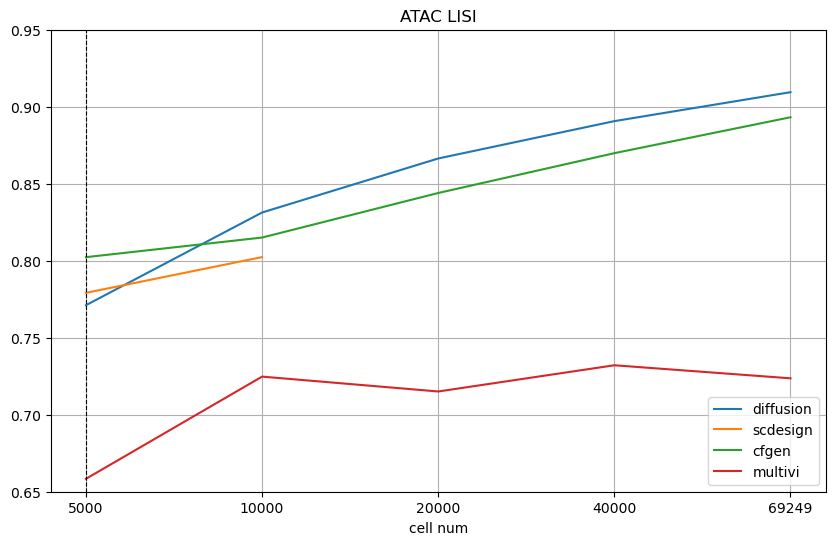

In [42]:
# 创建折线图
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.figure(figsize=(10, 6))  # 设置图形大小
x = np.linspace(0, 4, 5)
plt.plot(x, diffusion_atac_lisi, label='diffusion')  # 绘制第一条线，指定线条标签和颜色
plt.plot(x[:2], scdesign_atac_lisi, label='scdesign')  # 绘制第二条线
plt.plot(x, cfgen_atac_lisi, label='cfgen')  # 绘制第三条线
plt.plot(x, multivi_atac_lisi, label='multivi') 

# 设置图形属性
plt.title('ATAC LISI')        # 设置标题
plt.xlabel('cell num')                    # 设置 x 轴标签
plt.xticks(x, ['5000','10000','20000','40000','69249'])
# plt.ylabel('Y-axis')                    # 设置 y 轴标签
plt.ylim(0.65, 0.95)                       # 设置 y 轴范围
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # 添加水平参考线
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # 添加垂直参考线
plt.grid()                              # 添加网格
plt.legend()                            # 显示图例

# 显示图形
plt.savefig(f'/stor/lep/workspace/multi_diffusion/MM-Diffusion/evaluate_script/figures/scale_up/ATAC_LISI.pdf')
# plt.show()

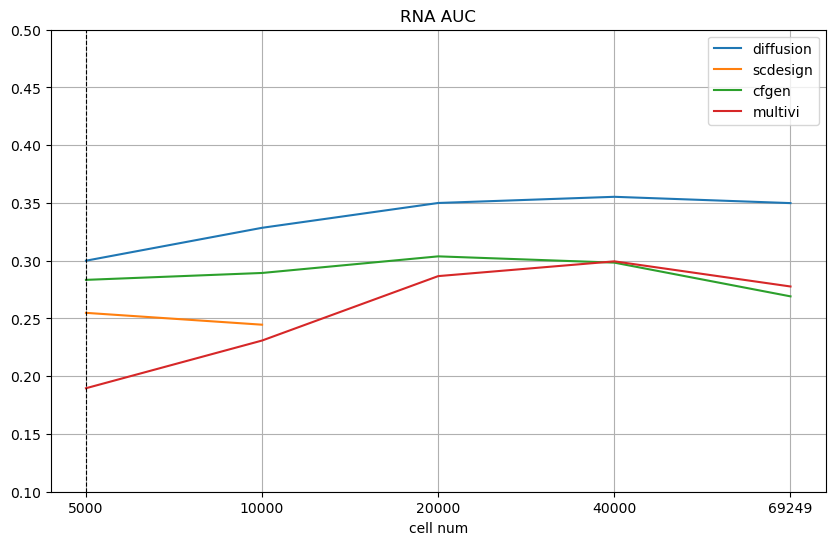

In [43]:
# 创建折线图
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.figure(figsize=(10, 6))  # 设置图形大小
x = np.linspace(0, 4, 5)
plt.plot(x, 1-np.array(diffusion_rna_auc), label='diffusion')  # 绘制第一条线，指定线条标签和颜色
plt.plot(x[:2], 1-np.array(scdesign_rna_auc), label='scdesign')  # 绘制第二条线
plt.plot(x, 1-np.array(cfgen_rna_auc), label='cfgen')  # 绘制第三条线
plt.plot(x, 1-np.array(multivi_rna_auc), label='multivi') 

# 设置图形属性
plt.title('RNA AUC')        # 设置标题
plt.xlabel('cell num')                    # 设置 x 轴标签
plt.xticks(x, ['5000','10000','20000','40000','69249'])
# plt.yticks([])
# plt.ylabel('Y-axis')                    # 设置 y 轴标签
plt.ylim(0.1, 0.5)                       # 设置 y 轴范围
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # 添加水平参考线
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # 添加垂直参考线
plt.grid()                              # 添加网格
plt.legend()                            # 显示图例

# 显示图形
plt.savefig(f'/stor/lep/workspace/multi_diffusion/MM-Diffusion/evaluate_script/figures/scale_up/RNA_AUC.pdf')
# plt.show()

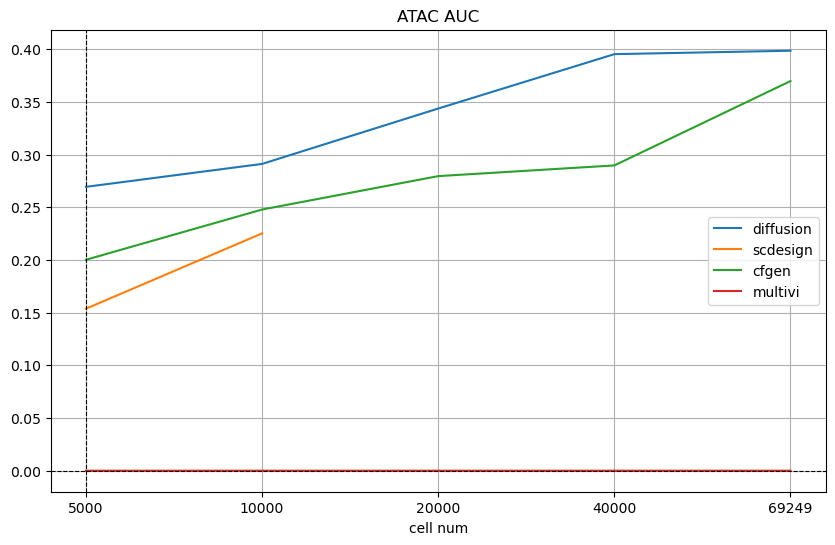

In [48]:
# 创建折线图
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.figure(figsize=(10, 6))  # 设置图形大小
x = np.linspace(0, 4, 5)
plt.plot(x, 1-np.array(diffusion_atac_auc), label='diffusion')  # 绘制第一条线，指定线条标签和颜色
plt.plot(x[:2], 1-np.array(scdesign_atac_auc), label='scdesign')  # 绘制第二条线
plt.plot(x, 1-np.array(cfgen_atac_auc), label='cfgen')  # 绘制第三条线
plt.plot(x, 1-np.array(multivi_atac_auc), label='multivi') 

# 设置图形属性
plt.title('ATAC AUC')        # 设置标题
plt.xlabel('cell num')                    # 设置 x 轴标签
plt.xticks(x, ['5000','10000','20000','40000','69249'])
# plt.yticks([])
# plt.ylabel('Y-axis')                    # 设置 y 轴标签
# plt.ylim(0.1, 0.5)                       # 设置 y 轴范围
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # 添加水平参考线
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # 添加垂直参考线
plt.grid()                              # 添加网格
plt.legend()                            # 显示图例

# 显示图形
# plt.savefig(f'/stor/lep/workspace/multi_diffusion/MM-Diffusion/evaluate_script/figures/scale_up/ATAC_AUC.pdf')
# plt.show()

# rare cell argumentation

In [52]:
diffusion_arg_1 = [0,0.26,0.63,0.70,0.75]
duplicate_arg_1 = [0,0.16,0.45,0.62,0.66]
diffusion_arg_2 = [0,0.07,0.42,0.62,0.80,0.82]
duplicate_arg_2 = [0,0.02,0.29,0.59,0.65,0.75]

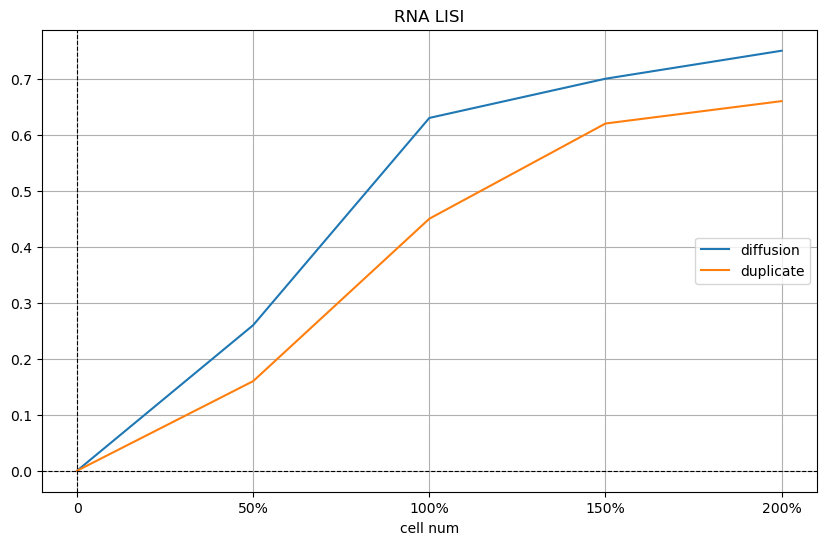

In [53]:
# 创建折线图
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.figure(figsize=(10, 6))  # 设置图形大小
x = np.linspace(0, 4, 5)
plt.plot(x, diffusion_arg_1, label='diffusion')  # 绘制第一条线，指定线条标签和颜色
plt.plot(x, duplicate_arg_1, label='duplicate')  # 绘制第二条线

# 设置图形属性
plt.title('RNA LISI')        # 设置标题
plt.xlabel('cell num')                    # 设置 x 轴标签
plt.xticks(x, ['0','50%','100%','150%','200%'])
# plt.ylabel('Y-axis')                    # 设置 y 轴标签
# plt.ylim(0.75, 0.9)                       # 设置 y 轴范围
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # 添加水平参考线
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # 添加垂直参考线
plt.grid()                              # 添加网格
plt.legend()                            # 显示图例

# 显示图形
plt.savefig(f'/stor/lep/workspace/multi_diffusion/MM-Diffusion/evaluate_script/figures/scale_up/arug_rna_lisi_cdc2.pdf')
# plt.show()

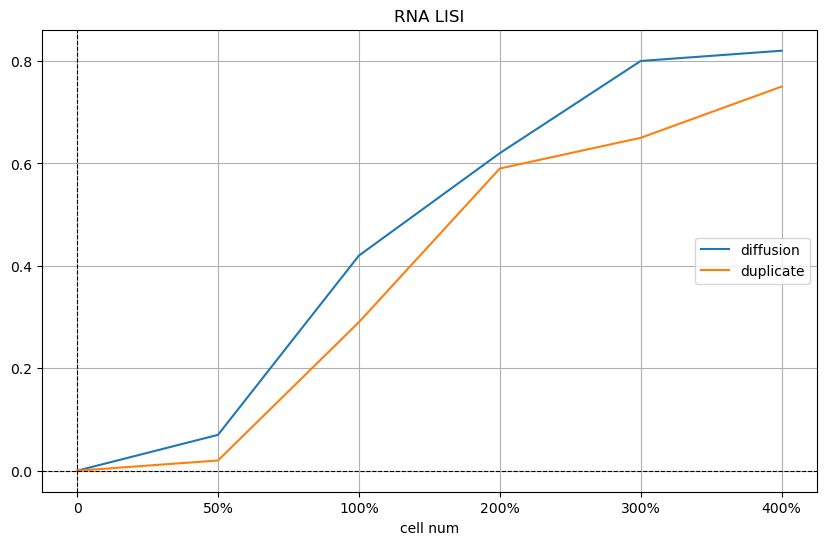

In [51]:
# 创建折线图
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.figure(figsize=(10, 6))  # 设置图形大小
x = np.linspace(0, 5, 6)
plt.plot(x, diffusion_arg_2, label='diffusion')  # 绘制第一条线，指定线条标签和颜色
plt.plot(x, duplicate_arg_2, label='duplicate')  # 绘制第二条线

# 设置图形属性
plt.title('RNA LISI')        # 设置标题
plt.xlabel('cell num')                    # 设置 x 轴标签
plt.xticks(x, ['0','50%','100%','200%','300%','400%'])
# plt.ylabel('Y-axis')                    # 设置 y 轴标签
# plt.ylim(0.75, 0.9)                       # 设置 y 轴范围
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # 添加水平参考线
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # 添加垂直参考线
plt.grid()                              # 添加网格
plt.legend()                            # 显示图例

# 显示图形
plt.savefig(f'/stor/lep/workspace/multi_diffusion/MM-Diffusion/evaluate_script/figures/scale_up/arug_rna_lisi_plasma.pdf')
# plt.show()

In [34]:
290*3

870